In [2]:
!pip install keras cython h5py --quiet

In [1]:
import pandas as pd
import numpy as np

In [2]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
import zipfile

In [4]:
four_keypoints_2 = pd.read_pickle('four_keypoints_2.data')

In [5]:
X = four_keypoints_2['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y = four_keypoints_2.drop('Image', axis=1).values

In [6]:
X = np.vstack(X) / 255
y = (y - 48) / 48

In [7]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential

In [8]:
# mlp = Sequential([
#     Dense(100, input_dim=9216),
#     Activation('relu'),
#     Dense(8)
# ])

In [9]:
# mlp.summary()

In [10]:
# mlp.compile(optimizer='sgd',
#            loss='mse',
#            metrics=None)

In [11]:
# mlp.fit(X, y, epochs=100, validation_split=.2)

In [12]:
# mlp.evaluate(X, y)

In [47]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3),
           activation='relu',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.2),
    
    Conv2D(64, kernel_size=(2, 2),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.3),

    Conv2D(128, kernel_size=(2, 2),
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.5),    
    
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(.6),
    Dense(1000, activation='relu'),

    
    Dense(8)
])

In [48]:
cnn.compile(loss='mse', optimizer='sgd')

In [49]:
X2 = X.reshape(-1, 96, 96, 1)

In [51]:
cnn.fit(X2, y, validation_split=.2, epochs=100)

Train on 7420 samples, validate on 1855 samples
Epoch 1/100
7420/7420 [==============================] - 9s - loss: 0.0148 - val_loss: 0.0136
Epoch 2/100
7420/7420 [==============================] - 9s - loss: 0.0146 - val_loss: 0.0136
Epoch 3/100
7420/7420 [==============================] - 9s - loss: 0.0146 - val_loss: 0.0134
Epoch 4/100
7420/7420 [==============================] - 9s - loss: 0.0144 - val_loss: 0.0134
Epoch 5/100
7420/7420 [==============================] - 9s - loss: 0.0144 - val_loss: 0.0132
Epoch 6/100
7420/7420 [==============================] - 9s - loss: 0.0144 - val_loss: 0.0132
Epoch 7/100
7420/7420 [==============================] - 9s - loss: 0.0143 - val_loss: 0.0131
Epoch 8/100
7420/7420 [==============================] - 9s - loss: 0.0142 - val_loss: 0.0131
Epoch 9/100
7420/7420 [==============================] - 9s - loss: 0.0142 - val_loss: 0.0130
Epoch 10/100
7420/7420 [==============================] - 9s - loss: 0.0141 - val_loss: 0.0128
Epoch 11/10

7420/7420 [==============================] - 9s - loss: 0.0117 - val_loss: 0.0106
Epoch 87/100
7420/7420 [==============================] - 9s - loss: 0.0116 - val_loss: 0.0106
Epoch 88/100
7420/7420 [==============================] - 10s - loss: 0.0116 - val_loss: 0.0105
Epoch 89/100
7420/7420 [==============================] - 9s - loss: 0.0116 - val_loss: 0.0105
Epoch 90/100
7420/7420 [==============================] - 9s - loss: 0.0116 - val_loss: 0.0105
Epoch 91/100
7420/7420 [==============================] - 9s - loss: 0.0116 - val_loss: 0.0104
Epoch 92/100
7420/7420 [==============================] - 9s - loss: 0.0116 - val_loss: 0.0104
Epoch 93/100
7420/7420 [==============================] - 9s - loss: 0.0116 - val_loss: 0.0104
Epoch 94/100
7420/7420 [==============================] - 9s - loss: 0.0115 - val_loss: 0.0104
Epoch 95/100
7420/7420 [==============================] - 9s - loss: 0.0115 - val_loss: 0.0104
Epoch 96/100
7420/7420 [==============================] - 9s -

In [72]:
cnn.save('cnn2.h5')

In [52]:
with zipfile.ZipFile('data/test.zip') as zip:
    with zip.open('test.csv') as myZip:
        df_test = pd.read_csv(myZip)

In [53]:
X_test = df_test['Image'].apply(lambda image: np.fromstring(image, sep=' '))
X_test = np.vstack(X_test)/255

In [54]:
X2_test = X_test.reshape(-1, 96, 96, 1)

In [55]:
y_pred_cnn = cnn.predict(X2_test)

In [56]:
y_pred_cnn = y_pred_cnn*48 + 48

In [57]:
cnn_pred_df = pd.DataFrame(y_pred_cnn, columns=four_keypoints_2.drop('Image', axis=1).columns)

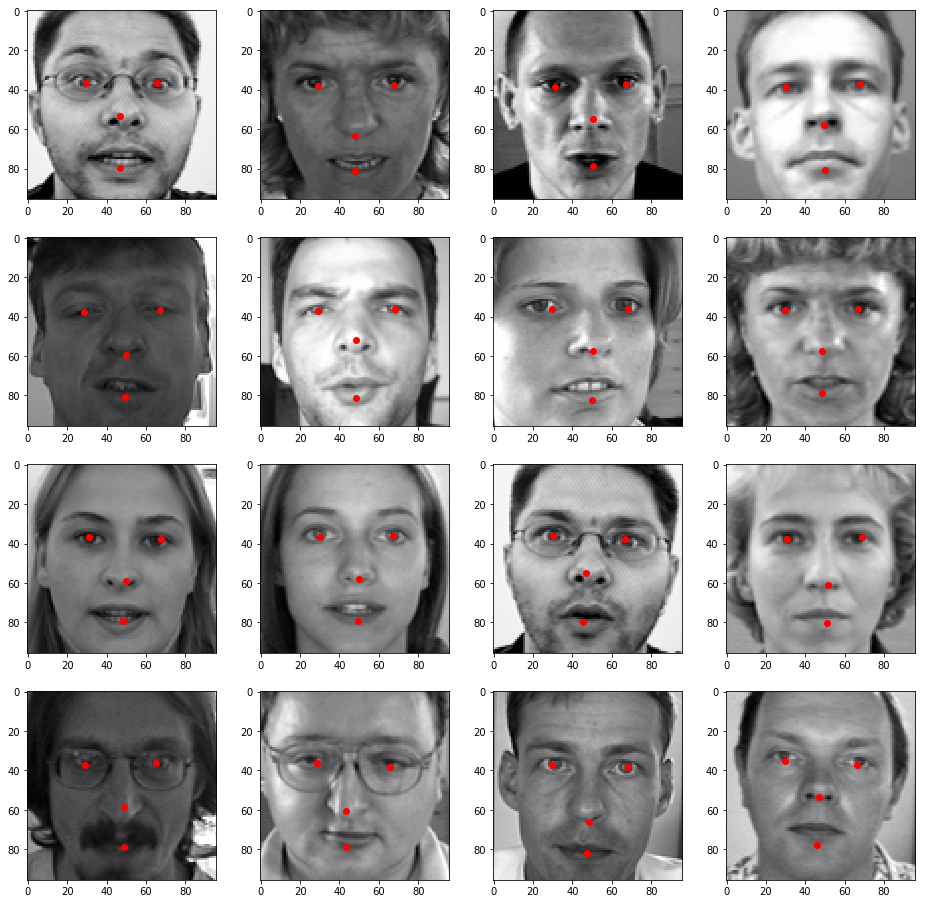

In [58]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_pred_df.iloc[i*4 + j, 2*k], cnn_pred_df.iloc[i*4 + j, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_test[i*4 + j].reshape(96, 96), cmap='gray')

In [59]:
a = four_keypoints_2[four_keypoints_2['nose_tip_y'] == max(four_keypoints_2['nose_tip_y'])]

In [60]:
a=a.iloc[0,:]

In [61]:
b = np.fromstring(a.Image, sep=' ')
b = np.vstack(b)/255

In [62]:
c = b.reshape(-1, 96, 96, 1)

In [63]:
single_pred = cnn.predict(c)*48 +48
single_pred = pd.DataFrame(single_pred, columns=four_keypoints_2.drop('Image', axis=1).columns)

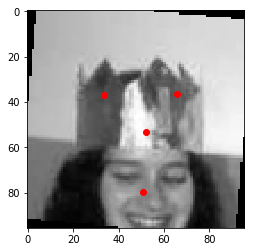

In [64]:
for k in range(4):
    plt.plot(single_pred.iloc[0, 2*k], cnn_pred_df.iloc[0, 2*k+1], c='r', marker='o')
plt.imshow(b.reshape(96, 96), cmap='gray')

In [65]:
y_train_pred_cnn = cnn.predict(X2)

In [66]:
y_train_pred_cnn = y_train_pred_cnn*48 + 48

In [67]:
cnn_train_pred_df = pd.DataFrame(y_train_pred_cnn, columns=four_keypoints_2.drop('Image', axis=1).columns)

In [68]:
from random import randint

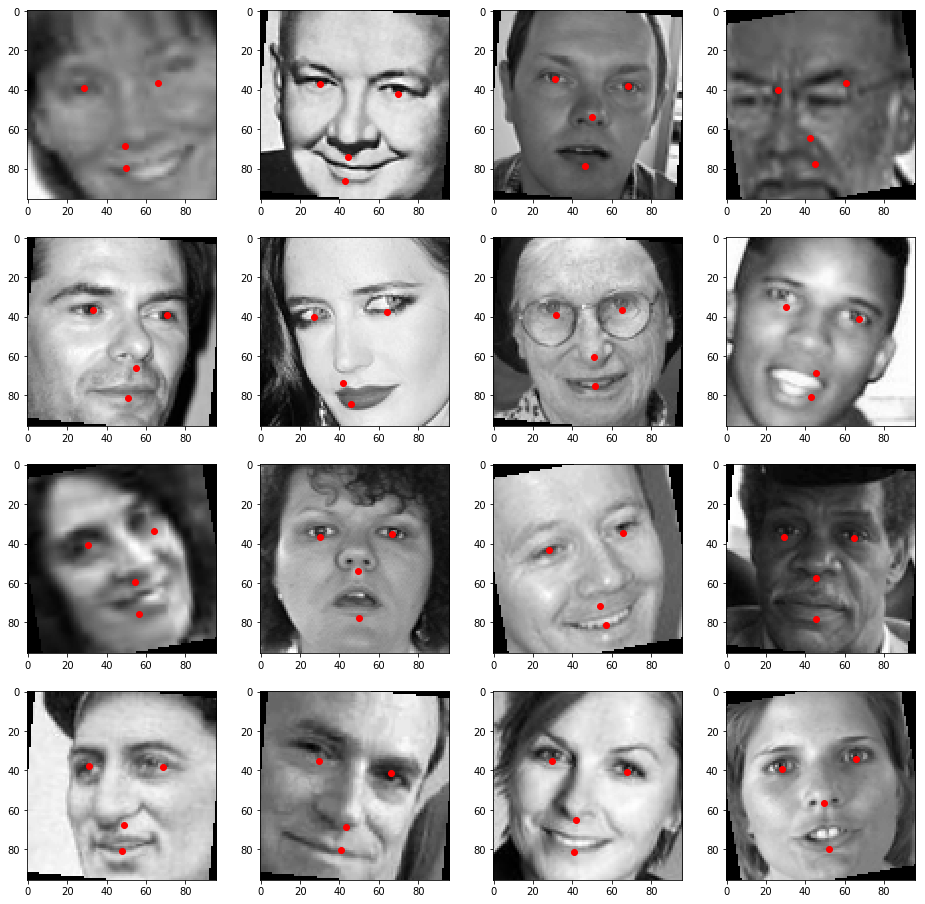

In [71]:
rndm = randint(0, 9200)
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k], cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X[i*4 + j + rndm].reshape(96, 96), cmap='gray')

In [73]:
with zipfile.ZipFile('data/training.zip') as zip:
    with zip.open('training.csv') as myZip:
        df = pd.read_csv(myZip)

In [79]:
df = df.loc[:, ['nose_tip_x', 'nose_tip_y',
                'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y',
                'left_eye_center_x', 'left_eye_center_y',
                'right_eye_center_x', 'right_eye_center_y',
                'Image']
           ].dropna()

df.shape

(7000, 9)

In [80]:
X = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y = df.drop('Image', axis=1).values

In [81]:
X = np.vstack(X) / 255
y = (y - 48) / 48

In [82]:
X2 = X.reshape(-1, 96, 96, 1)

In [83]:
cnn.evaluate(X2, y)

7000/7000 [==============================] - 2s     


0.0049867083419646539

In [84]:
from keras.models import load_model
cnn1 = load_model('cnn1.h5')

In [85]:
cnn1.evaluate(X2, y)

6880/7000 [============================>.] - ETA: 0s

0.003992035314573773